<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/GO_referral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: gdrive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<ipython-input-18-4180da783c12>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['紹介元'] = pd.Categorical(df['紹介元'], categories=categories)
<ipython-input-18-4180da783c12>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


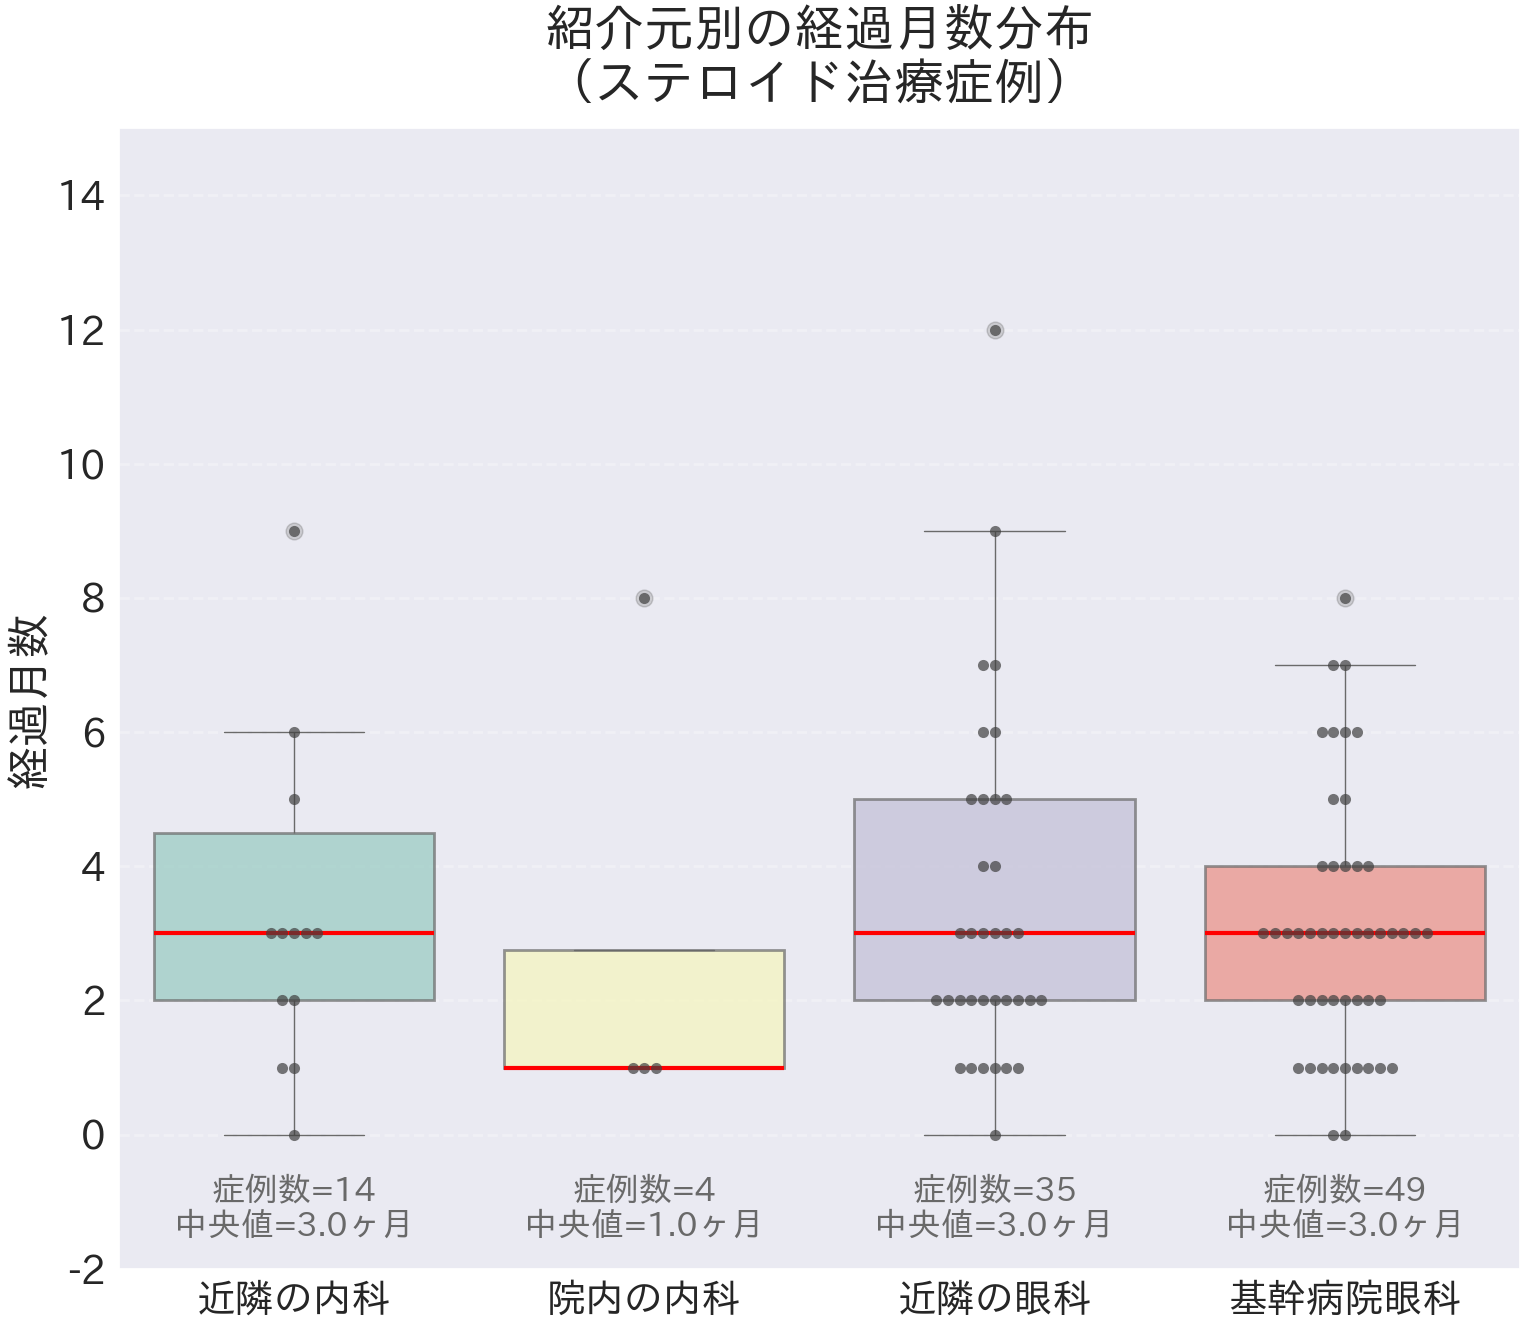

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# フォント設定を最初に行う
plt.rcParams['font.family'] = 'IPAexGothic'
sns.set(font='IPAexGothic', font_scale=2.5)  # font_scale を2.5に増加
plt.rcParams['axes.unicode_minus'] = False

def load_and_prepare_data(file_path):
    """データの読み込みと前処理を行う関数"""
    df = pd.read_excel(file_path, sheet_name='A0403_検査結果')

    referral_code_map = {
        "0": "近隣の内科",
        "1": "院内の内科",
        "2": "近隣の眼科",
        "3": "基幹病院眼科",
    }

    df['紹介元'] = df[
        "0近隣内科、1院内内科、2近隣眼科、3基幹病院眼科、4当院眼科、5.その他"
    ].astype(str).map(referral_code_map)

    df['いつから（M）'] = pd.to_numeric(df['いつから（M）'], errors='coerce')

    return df

def filter_steroid_cases(df):
    """ステロイド治療症例のフィルタリング"""
    steroid_columns = [col for col in df.columns if "ステロイド" in col]
    if not steroid_columns:
        print("警告: ステロイド治療の列が見つかりませんでした。全データを使用します。")
        return df

    return df[df[steroid_columns[0]] != 0]

def create_modern_boxplot(df, categories):
    """モダンな箱ひげ図の作成（seabornを使用）"""
    # プロット設定
    plt.figure(figsize=(16, 14))

    df['紹介元'] = pd.Categorical(df['紹介元'], categories=categories)

    # 箱ひげ図
    ax = sns.boxplot(
        data=df,
        x='紹介元',
        y='いつから（M）',
        order=categories,
        palette='Set3',
        showfliers=True,
        medianprops={"color": "red", "linewidth": 3},
        boxprops={"alpha": 0.7, "linewidth": 2},
        flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'alpha': 0.3, 'markersize': 12}
    )

    # スウォームプロット
    sns.swarmplot(
        data=df,
        x='紹介元',
        y='いつから（M）',
        order=categories,
        color='0.25',
        size=8,
        alpha=0.7,
        dodge=True
    )

    # グラフの設定
    plt.xlabel('')
    plt.ylabel('経過月数', fontsize=32, fontweight='bold')  # さらに大きく
    plt.title('紹介元別の経過月数分布\n（ステロイド治療症例）',
              fontsize=36, pad=20, fontweight='bold')  # さらに大きく

    plt.ylim(-2, 15)

    # グリッド線
    plt.grid(axis='y', linestyle='--', alpha=0.3, linewidth=2)

    # 軸の設定
    plt.xticks(rotation=0, fontsize=28)  # さらに大きく
    plt.yticks(fontsize=28)  # さらに大きく

    # 余白の調整
    plt.subplots_adjust(bottom=0.2, left=0.15)  # 左余白を増やして軸ラベルが切れないように

    # 統計情報
    for i, category in enumerate(categories):
        data = df[df['紹介元'] == category]['いつから（M）'].dropna()
        if len(data) > 0:
            median = data.median()
            count = len(data)
            plt.text(i, -1.5, f'症例数={count}\n中央値={median:.1f}ヶ月',
                    horizontalalignment='center',
                    size=24,  # さらに大きく
                    color='dimgray',
                    fontweight='bold')

    # タイトルと軸ラベルが切れないように調整
    plt.tight_layout()
    return plt.gcf()

def main():
    file_path = "/content/drive/MyDrive/発表/アムジェン社内講演20250214/甲状腺眼症ステロイド紹介元.xlsx"

    display_order = [
        "近隣の内科",
        "院内の内科",
        "近隣の眼科",
        "基幹病院眼科",
    ]

    df = load_and_prepare_data(file_path)
    df_filtered = filter_steroid_cases(df)
    fig = create_modern_boxplot(df_filtered, display_order)
    plt.show()

if __name__ == "__main__":
    main()